### **Cancer Prediction Using KNN**

The following model will be created to predict whether or not a patient potentially has a cancerous predisposition based on the nature of two genes.

**Dependencies**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

**The Dataset**


In [2]:
GE_DF = pd.read_csv(r'https://raw.githubusercontent.com/ST10437317/kpillay-firstrepo-vc/main/ST10437317_GENE_EXPRESSION_DATA.csv')
GE_DF.head(10)

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
5,3.4,7.5,0
6,3.1,6.8,0
7,6.3,4.9,1
8,5.5,8.6,0
9,7.7,3.5,1


**Data Information**

In [3]:
GE_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


**Descriptive Statistics**

In [4]:
GE_DF.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


**Visualizations**

<Axes: xlabel='Gene One', ylabel='Gene Two'>

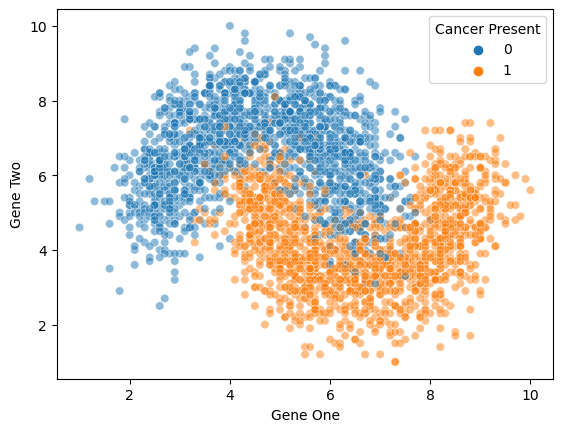

In [5]:
sns.scatterplot(data = GE_DF, x = "Gene One", y = "Gene Two", hue = "Cancer Present", alpha = 0.5)

**Training And Testing Splits**

In [6]:
X = GE_DF.drop(columns = ['Cancer Present'])
y = GE_DF['Cancer Present']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
len(X_train), len(X_test), len(y_train), len(y_test)

(2010, 990, 2010, 990)

In [7]:
SCALER = StandardScaler()

SCALED_X_TRAIN = SCALER.fit_transform(X_train)
SCALED_X_TEST  = SCALER.transform(X_test)

In [8]:
X.head(10)

,Gene One,Gene Two
0,4.3,3.9
1,2.5,6.3
2,5.7,3.9
3,6.1,6.2
4,7.4,3.4
5,3.4,7.5
6,3.1,6.8
7,6.3,4.9
8,5.5,8.6
9,7.7,3.5


In [9]:
pd.DataFrame(y.head(10))

,Cancer Present
0,1
1,0
2,1
3,0
4,1
5,0
6,0
7,1
8,0
9,1


In [10]:
pd.DataFrame(SCALED_X_TRAIN).head(10)

,0,1
0,-0.754728,0.184019
1,-0.425850,-0.685875
2,-1.631736,-0.105945
3,-0.206599,-0.685875
4,-1.631736,0.242012
5,0.560783,0.415991
6,1.163726,0.647963
7,0.341531,-1.091826
8,1.382978,0.531977
9,-0.973980,1.401872


In [11]:
pd.DataFrame(SCALED_X_TEST).head(10)

,0,1
0,1.163726,-0.743868
1,-0.151786,-1.497777
2,1.821482,-0.685875
3,-1.248045,0.184019
4,-0.480663,1.111907
5,1.382978,0.184019
6,-0.206599,0.473984
7,-0.919167,0.647963
8,-0.699915,1.691837
9,1.876295,-0.511896


**Determining The Most Optimal `n_neighbors` Value**

In [12]:
NUM_N = []
ACC   = []

for n in range(1, 31):
  KNN_MODEL = KNeighborsClassifier(n_neighbors = n)
  KNN_MODEL.fit(SCALED_X_TRAIN, y_train)
  NUM_N.append(n)
  ACC.append(KNN_MODEL.score(SCALED_X_TRAIN, y_train) * 100)

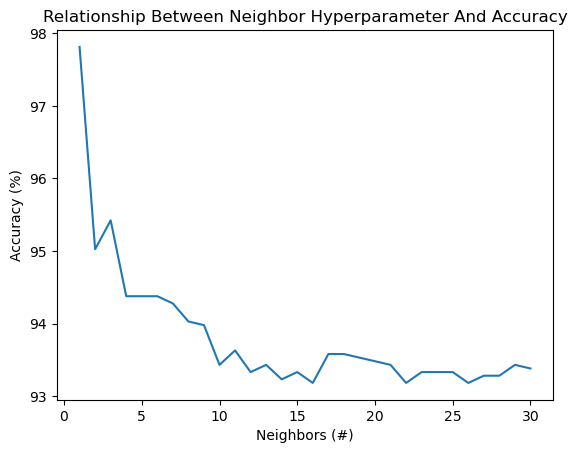

In [13]:
plt.plot(np.array(NUM_N), np.array(ACC))
plt.title('Relationship Between Neighbor Hyperparameter And Accuracy')
plt.xlabel('Neighbors (#)')
plt.ylabel('Accuracy (%)')
plt.show()

**Fitting With Optimal `n_neighbors` value**

In [14]:
KNN_MODEL = KNeighborsClassifier(n_neighbors = 1)
KNN_MODEL.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

**Predictions**

In [15]:
KNN_MODEL.fit(SCALED_X_TRAIN, y_train)
y_preds = KNN_MODEL.predict(SCALED_X_TEST)
pd.DataFrame({'True Label' : y_test, 'Predicted Label' : y_preds})

,True Label,Predicted Label
1801,1,1
1190,1,1
1817,1,1
251,0,0
2505,0,0
...,...,...
2468,1,1
2013,1,1
714,1,1
803,0,0


**Model Assessment**

In [16]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       510
           1       0.91      0.88      0.89       480

    accuracy                           0.90       990
   macro avg       0.90      0.90      0.90       990
weighted avg       0.90      0.90      0.90       990



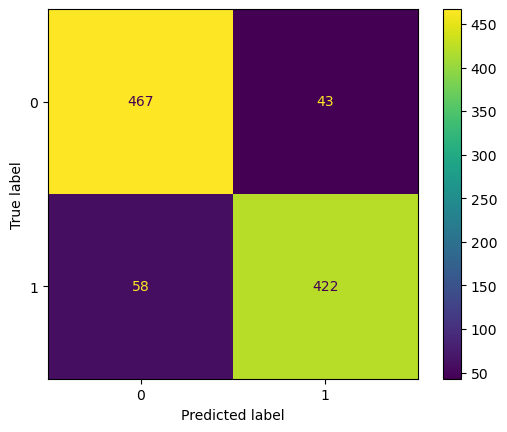

In [17]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
plt.show()

**Using A Pipeline**

A pipeline in `sklearn` is used to create a sequence of operations or steps that the model will go through when fitting to the data.

**Model Instance, Scaler Class, Operations And Pipeline Instance**



In [18]:
SCALER_TWO        = StandardScaler()
KNN_TWO           = KNeighborsClassifier()
OPERATIONS        = [('scaler', SCALER_TWO), ('knn', KNN_TWO)]
PIPE              = Pipeline(OPERATIONS)
NEIGHBOURS        = list(range(1, 21))
PARAMS_GRID       = {'knn__n_neighbors': NEIGHBOURS}
CV_KNN_CLASSIFIER = GridSearchCV(PIPE, PARAMS_GRID, cv = 5, scoring = 'accuracy')

**Cross Validation KNN Model Fitting**

Cross validation will test the model on multiple hyperparameter values on different data splits to find the most optimal value.

In [19]:
CV_KNN_CLASSIFIER.fit(X_train, y_train);
CV_KNN_CLASSIFIER.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=19))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=19),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 19,
 'knn__p': 2,
 'knn__weights': 'uniform'}

**Predictions**

In [20]:
NEW_y_PREDS = CV_KNN_CLASSIFIER.predict(X_test)
pd.DataFrame({'True Label' : y_test, 'Predicted Label' : NEW_y_PREDS})

,True Label,Predicted Label
1801,1,1
1190,1,1
1817,1,1
251,0,0
2505,0,0
...,...,...
2468,1,1
2013,1,1
714,1,1
803,0,0


In [21]:
print(classification_report(y_test, NEW_y_PREDS))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       510
           1       0.95      0.93      0.94       480

    accuracy                           0.94       990
   macro avg       0.94      0.94      0.94       990
weighted avg       0.94      0.94      0.94       990



**New Data**

In [22]:
NEW_GENES = [[3.8, 6.4]]
CV_KNN_CLASSIFIER.predict(NEW_GENES)

c:\tools\Anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [23]:
CV_KNN_CLASSIFIER.predict_proba(NEW_GENES)

c:\tools\Anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.89473684, 0.10526316]])